In [20]:
# Loading necessary modules.
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from os import fspath
%matplotlib inline
import seaborn as sns
import math
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.analysis.align import AlignTraj
from MDAnalysis.analysis.rms import RMSD, RMSF
from MDAnalysis.analysis.pca import PCA, cosine_content


This jupyter script has been used to concatenate and analyze 

Alignment and Concatenation of subsequent trajectories 

In [26]:
import nglview

In [16]:
data_path = "../../data/02_processed/02_prod/"
sel = 'name CA'

#concatenation 

traj_1 = data_path + "prod_1/prod_1_nbc.xtc"
traj_2 = data_path + "prod_2/prod_2_nbc.xtc"
config_file = data_path + "prod_2/step5_prod_2.tpr"
concat_traj_file = data_path + "prod_2_not_terminated/step5_prod_2.xtc"

conc_traj = mda.Universe(config_file, [traj_1,traj_2])
ref_traj = mda.Universe(config_file, traj_2)

ref_traj.trajectory[-1]
aligner = AlignTraj(conc_traj,ref_traj,select=sel,filename = concat_traj_file)
aligner.run()


In [17]:
print(f"Frames of traj_1 + traj_2: {ref_traj.trajectory.n_frames}")

Frames of traj_1 + traj_2: 201


                                                            
                                                        RMSD and RMSF 

Text(0, 0.5, 'RMSD')

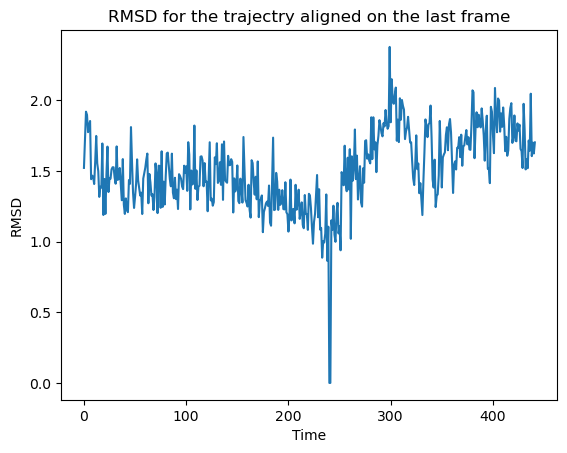

In [ ]:
R = RMSD(conc_traj, ref_traj, select=sel).run()

plt.title("RMSD for the trajectry aligned on the last frame")
plt.plot(R.results.rmsd[:,0], R.results.rmsd[:,2])
plt.xlabel('Time (ns)')
plt.ylabel('RMSD')

Text(0, 0.5, 'RMSF')

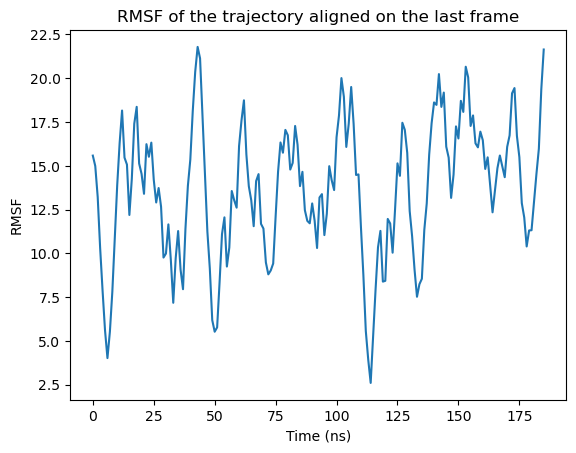

In [28]:
RF = RMSF(conc_traj.select_atoms(sel)).run()

plt.title('RMSF of the trajectory aligned on the last frame')
plt.plot(RF.results.rmsf)
plt.xlabel('Time (ns)')
plt.ylabel('RMSF')

Principal Component Analysis 

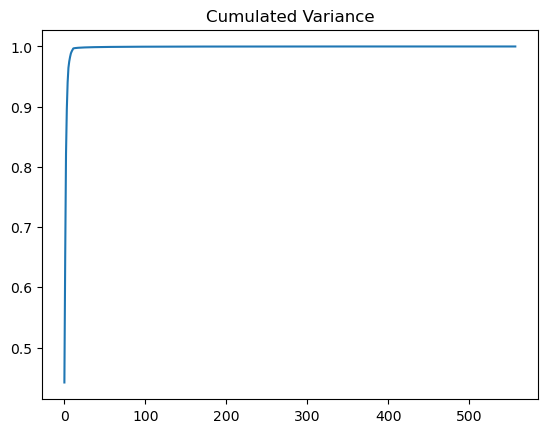

In [30]:
pca = PCA(conc_traj, select=sel)
pca.run()


plt.title('Cumulated Variance')
plt.plot(pca.results.cumulated_variance)

In [ ]:
pca_space = pca.transform(conc_traj.select_atoms(sel),2)
pca_data = pd.DataFrame(pca_space, columns=['first_comp','second_comp'])
pca_data["group"] = pca_data.index // 40
pca_data

,first_comp,second_comp,group
0,156.928911,151.128574,0
1,162.427175,148.054771,0
2,166.610583,130.641539,0
3,164.926544,133.080970,0
4,167.647134,126.985717,0
...,...,...,...
437,-26.554271,100.185589,10
438,-17.251550,111.499471,10
439,-11.344038,113.899661,10
440,4.617434,119.565417,11


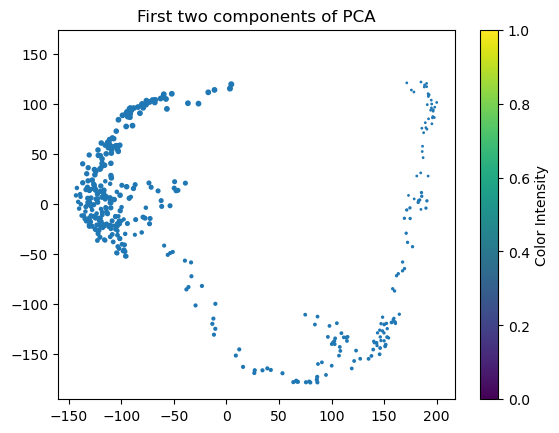

In [36]:
plt.title("First two components of PCA")
scatter = plt.scatter(pca_data['first_comp'], pca_data['second_comp'], pca_data['group'])
plt.colorbar(scatter, label = 'Color Intensity')

                                                    Radius of Gyration 